In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

580

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a2215a6103eb084a89357ccde40a20d


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#for i, item in enumerate(list):
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | san rafael del sur
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | santa cruz de la palma
Processing Record 16 of Set 1 | puerto escondido
Processing Record 17 of Set 1 | lushunkou
City not found. Skipping...
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | kitgum
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Pr

Processing Record 35 of Set 4 | ribeira grande
Processing Record 36 of Set 4 | umm kaddadah
Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | hackettstown
Processing Record 39 of Set 4 | grimshaw
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | prince rupert
Processing Record 42 of Set 4 | valledupar
Processing Record 43 of Set 4 | awbari
Processing Record 44 of Set 4 | prachuap khiri khan
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | northam
Processing Record 47 of Set 4 | khilok
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | ambilobe
Processing Record 1 of Set 5 | vanavara
Processing Record 2 of Set 5 | yining
Processing Record 3 of Set 5 | stoyba
City not found. Skipping...
Processing Record 4 of Set 5 | mrirt
City not found. Skipping...
Processing Record 5 of Set 5 | axim
Processing Re

Processing Record 23 of Set 8 | fallon
Processing Record 24 of Set 8 | shingu
Processing Record 25 of Set 8 | samarai
Processing Record 26 of Set 8 | tuy hoa
Processing Record 27 of Set 8 | camopi
Processing Record 28 of Set 8 | atar
Processing Record 29 of Set 8 | agdam
Processing Record 30 of Set 8 | arman
Processing Record 31 of Set 8 | vicente guerrero
Processing Record 32 of Set 8 | tacna
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | tomatlan
Processing Record 35 of Set 8 | nelson bay
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | salina
Processing Record 38 of Set 8 | inhambane
Processing Record 39 of Set 8 | tocantinopolis
City not found. Skipping...
Processing Record 40 of Set 8 | bontang
Processing Record 41 of Set 8 | itaueira
Processing Record 42 of Set 8 | omsukchan
Processing Record 43 of Set 8 | garowe
Processing Record 44 of Set 8 | suntar
Processing Record 45 of Set 8 | tefe
Processing Record 46 of Set 8 | kh

City not found. Skipping...
Processing Record 12 of Set 12 | starkville
Processing Record 13 of Set 12 | mount darwin
Processing Record 14 of Set 12 | el limon
Processing Record 15 of Set 12 | praia
Processing Record 16 of Set 12 | melchor de mencos
Processing Record 17 of Set 12 | hihifo
City not found. Skipping...
Processing Record 18 of Set 12 | omboue
Processing Record 19 of Set 12 | yuncheng
Processing Record 20 of Set 12 | poum
Processing Record 21 of Set 12 | cascais
Processing Record 22 of Set 12 | santa barbara
Processing Record 23 of Set 12 | ordzhonikidze
Processing Record 24 of Set 12 | kolokani
Processing Record 25 of Set 12 | inta
Processing Record 26 of Set 12 | lingao
Processing Record 27 of Set 12 | trofors
Processing Record 28 of Set 12 | vao
Processing Record 29 of Set 12 | bambous virieux
Processing Record 30 of Set 12 | nabinagar
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.27,141.97,43.47,79,100,7.96,AU,2020-07-09 17:57:12
1,Hermanus,-34.42,19.23,55.99,78,100,5.01,ZA,2020-07-09 17:57:13
2,Guerrero Negro,27.98,-114.06,79.34,45,52,8.93,MX,2020-07-09 17:57:13
3,San Rafael Del Sur,11.85,-86.44,86.00,66,40,13.87,NI,2020-07-09 17:57:13
4,Vaini,-21.20,-175.20,71.60,94,75,5.82,TO,2020-07-09 17:57:13
5,Rikitea,-23.12,-134.97,68.27,63,14,16.78,PF,2020-07-09 17:57:13
6,Albany,42.60,-73.97,90.00,66,3,4.12,US,2020-07-09 17:54:01
7,Kavieng,-2.57,150.80,82.29,77,15,9.48,PG,2020-07-09 17:57:13
8,Touros,-5.20,-35.46,80.60,74,75,11.41,BR,2020-07-09 17:57:13
9,Port Alfred,-33.59,26.89,69.01,58,76,5.01,ZA,2020-07-09 17:57:14


In [14]:
# Assign a variable
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new = city_data_df[new_column_order]
city_data_new

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2020-07-09 17:57:12,-38.27,141.97,43.47,79,100,7.96
1,Hermanus,ZA,2020-07-09 17:57:13,-34.42,19.23,55.99,78,100,5.01
2,Guerrero Negro,MX,2020-07-09 17:57:13,27.98,-114.06,79.34,45,52,8.93
3,San Rafael Del Sur,NI,2020-07-09 17:57:13,11.85,-86.44,86.00,66,40,13.87
4,Vaini,TO,2020-07-09 17:57:13,-21.20,-175.20,71.60,94,75,5.82
...,...,...,...,...,...,...,...,...,...
521,Lingao,CN,2020-07-09 17:58:31,19.91,109.69,83.79,72,100,11.92
522,Trofors,NO,2020-07-09 17:58:31,65.53,13.41,55.40,62,75,5.82
523,Vao,NC,2020-07-09 17:58:31,-22.67,167.48,67.50,74,14,24.00
524,Bambous Virieux,MU,2020-07-09 17:58:31,-20.34,57.76,72.00,60,20,14.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

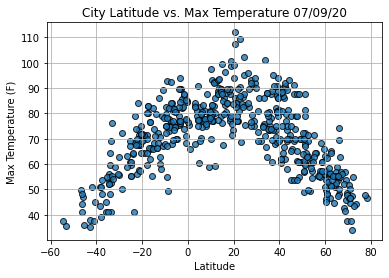

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

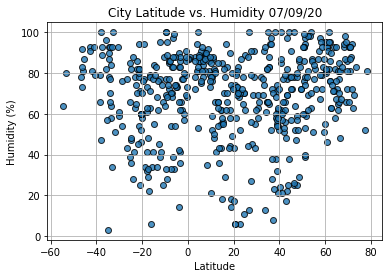

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

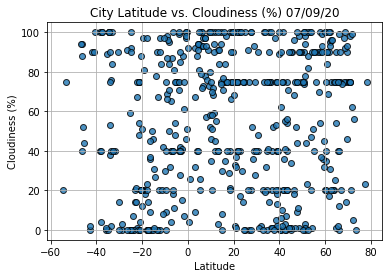

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

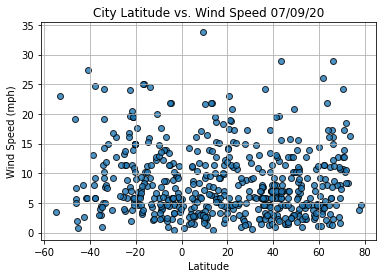

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()